In [207]:
import pandas as pd
import numpy as np
import math

In [208]:
m = pd.read_csv(r'../data/rotten_tomatoes_movies.csv')
cr = pd.read_csv(r'../data/rotten_tomatoes_critic_reviews.csv')
o = pd.read_csv(r'../data/the_oscar_award.csv')

In [209]:
o.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [210]:
movies_with_wl[movies_with_wl.wins > 0].head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,wins,losses
11,m/1000224-accused,The Accused,Out drinking one night after a fight with her ...,NaN,R,"Drama, Mystery & Suspense",Jonathan Kaplan,Tom Topor,"Jodie Foster, Kelly McGillis, Bernie Coulson, ...",1988-10-14,...,91.0,22.0,Upright,79.0,20821.0,1,20,2,1.0,0.0
15,m/10002635-bridge_of_san_luis_rey,The Bridge of San Luis Rey,"During the Spanish Inquisition, Franciscan mon...",Despite an all-star cast and some impressive v...,PG,"Art House & International, Drama, Faith & Spir...",Mary McGuckian,Mary McGuckian,"Gabriel Byrne, F. Murray Abraham, Kathy Bates,...",2005-06-10,...,4.0,24.0,Spilled,35.0,1935.0,13,1,23,1.0,1.0
20,m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"When King Richard the Lionheart is captured, h...",Errol Flynn thrills as the legendary title cha...,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller, Michael ...","Errol Flynn, Olivia de Havilland, Basil Rathbo...",1938-05-14,...,100.0,48.0,Upright,89.0,33946.0,8,48,0,3.0,1.0
43,m/1000560-alamo,The Alamo,"In 1836, the Mexican army, led by General Sant...",John Wayne proves to be less compelling behind...,NR,"Action & Adventure, Classics, Drama, Western",John Wayne,James Edward Grant,"John Wayne, Richard Widmark, Laurence Harvey, ...",1960-10-24,...,52.0,21.0,Upright,63.0,7337.0,4,11,10,1.0,6.0
49,m/10006057-moonlight,Moonlight,"Claire, a Dutch girl, discovers a wounded boy ...",NaN,R,"Drama, Mystery & Suspense",Paula Van der Oest,Carel Donck,"Laurien Van Den Broeck, Hunter Bussemaker, Joh...",2003-10-17,...,60.0,10.0,Upright,67.0,1430.0,6,6,4,3.0,5.0


Historically, are rotten tomatoes ratings good predictors of Oscar Success?

What defines Oscar Success?

Is winning Best Actor the same as Oscar Success for a film?

In [211]:
# Filter rotten tomatoes data to films for which we have Oscar data
o['wins'] = o['winner'].map(lambda x: 1 if x == True else 0, na_action='ignore')
o['losses'] = o['winner'].map(lambda x: 1 if x == False else 0, na_action='ignore')

In [212]:
wl_by_film = o.groupby('film')[['wins', 'losses']].sum()

In [213]:
movies_with_wl = pd.merge(m, wl_by_film, left_on='movie_title', right_on='film', how='left')

In [214]:
movies_with_wl['wins'] = movies_with_wl.wins.fillna(0)
movies_with_wl.losses = movies_with_wl.losses.fillna(0)

<AxesSubplot: xlabel='tomatometer_rating', ylabel='wins'>

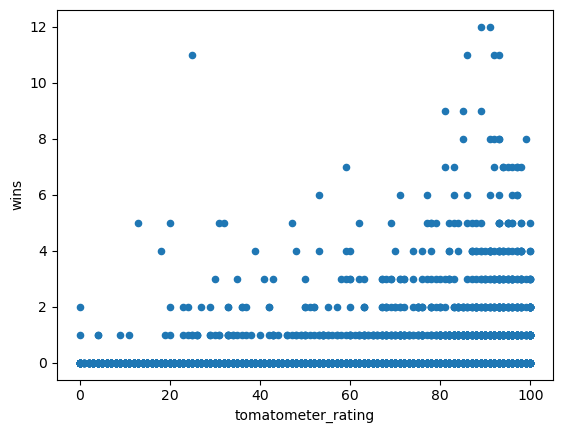

In [215]:
movies_with_wl.plot(x='tomatometer_rating', y='wins', kind='scatter')

In [216]:
movies_with_wl.tomatometer_rating.corr(movies_with_wl.wins)

0.12390018840502937

In [217]:
movies_with_wl.audience_rating.corr(movies_with_wl.wins)

0.15097447382970136

In [218]:
cr.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [219]:
cr[cr.review_score.notna()]

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [220]:
cr[cr.review_score.isna()]

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
...,...,...,...,...,...,...,...,...
1129998,m/zulu,Variety Staff,True,Variety,Fresh,NaN,2009-01-02,Joseph E. Levine makes an impressive debut in ...
1130001,m/zulu,Kenneth Turan,True,Los Angeles Times,Fresh,NaN,2017-07-10,"This may not be exact history, but it certainl..."
1130003,m/zulu,Will Heaven,True,Daily Telegraph (UK),Fresh,NaN,2017-07-10,"It may not be truthful - but, my God, the resu..."
1130007,m/zulu,Isabel Quigly,False,The Spectator,Fresh,NaN,2020-03-11,"The tension mounts, breaks, mounts, seems unbe..."


In [221]:
def parse_frac_score(s):
    if '/' not in s:
        return -1
    
    spl = s.split('/')
    assert(len(spl) == 2)
    num = float(spl[0])
    den = float(spl[1])
    
    if den == 0:
        print(f"Den 0 for {s}")
        return -1
    
    return num/den

def parse_letter_score(s):
    max_score = ord('A')
    min_score = ord('F')
    mods = {
        '+': 0.5,
        '-': -0.5
    }
    
    if len(s) > 2 or len(s) < 1:
        return -1
    
    base = abs(ord(s[0]) - min_score)
    
    if len(s) == 2:
        if s[1] not in mods:
            return -1
        base += mods[s[1]]
        
    score = max(0, base)
    score = min(1, score)
    return score / abs(max_score - min_score)

def parse_score(s):
    s = s.replace(" ", "")
    ret = -1
    ret = parse_frac_score(s)
    
    if ret < 0:
        ret = parse_letter_score(s)
        
    if ret < 0:
        print(f"Score {s} cannot be parsed")
        return np.nan
    return ret

In [222]:
cr['norm_score'] = cr.review_score.map(parse_score, na_action='ignore')

Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 25 cannot be parsed
Score 88 cannot be parsed
Score 48 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 45 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Den 0 for 61/00
Score 61/00 cannot be parsed
Score 24 cannot be parsed
Score 35 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 10 cannot be parsed
Score 46 cannot be parsed
Score 90 cannot be parsed
Score 75 cannot be parsed
Score 10 cannot be parsed
Score 45 cannot be parsed
Score 10 cannot be parsed
Score 89 cannot be parsed
Score 10 cannot be parsed
Score 34 cannot be parsed
Den 0 for 4/0
Score 4/0 cannot be parsed
Score 75 cannot be parsed
Score 75 cannot be parsed
Score 25 cannot be parsed
Scor

In [223]:
# Drop na norm_scores, this is a small portion of rows that have a review_score
cr = cr.dropna(subset = ['norm_score'])

In [224]:
avg_critic_scores = cr.groupby('rotten_tomatoes_link')['norm_score'].mean()


In [225]:
data = pd.merge(movies_with_wl, avg_critic_scores, on='rotten_tomatoes_link', how='left')

In [226]:
data.norm_score.corr(data.wins)

0.18324196745117124

<AxesSubplot: xlabel='norm_score', ylabel='wins'>

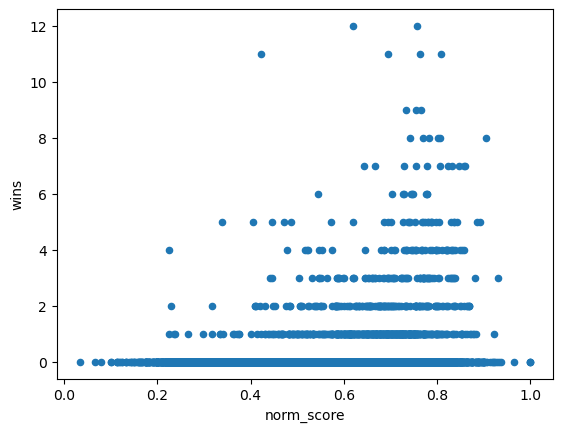

In [227]:
data.plot(x='norm_score', y='wins', kind='scatter')

<AxesSubplot: ylabel='Frequency'>

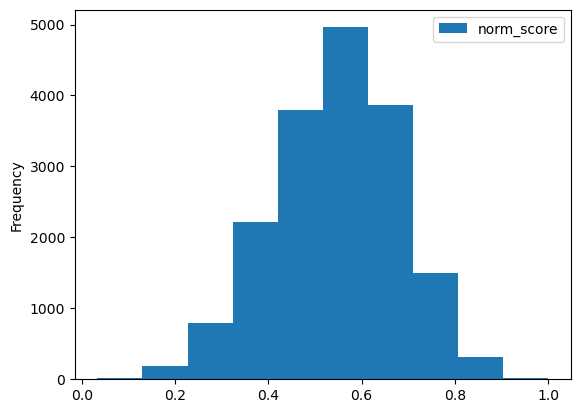

In [232]:
data.plot(y='norm_score', kind='hist')

<AxesSubplot: ylabel='Frequency'>

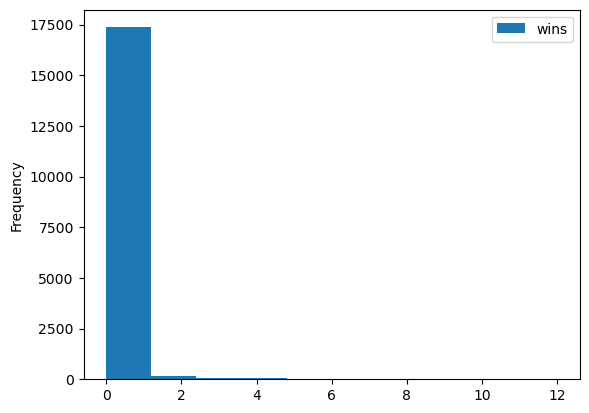

In [233]:
data.plot(y='wins', kind='hist')

In [240]:
data['success'] = data.wins > 0

array([<AxesSubplot: title={'center': 'False'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'True'}, ylabel='Frequency'>],
      dtype=object)

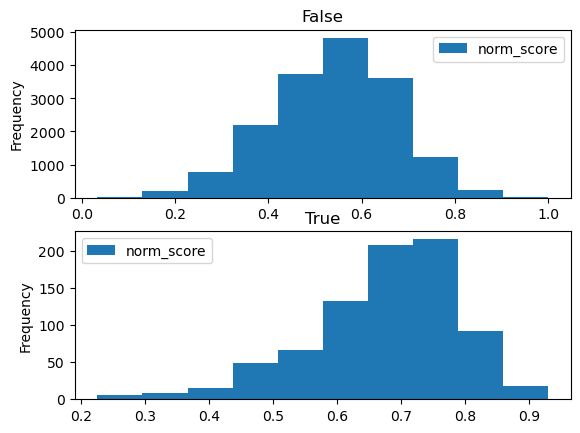

In [242]:
data.plot.hist(column=['norm_score'], by='success')

<AxesSubplot: title={'center': 'norm_score'}, xlabel='wins'>

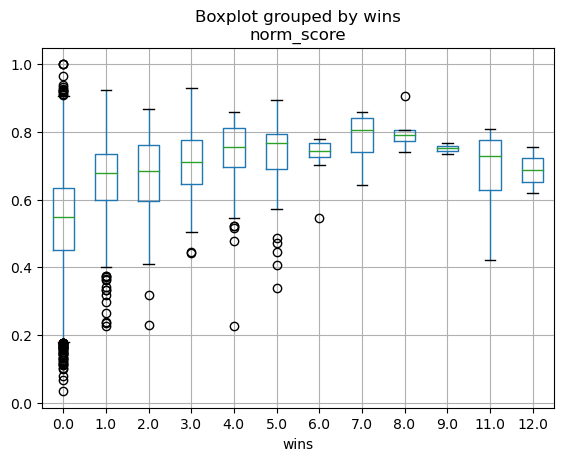

In [250]:
data.boxplot(column='norm_score', by='wins')

0.0     16899
1.0       472
2.0       149
3.0        77
4.0        48
5.0        31
7.0        11
6.0        10
8.0         6
11.0        4
9.0         3
12.0        2
Name: wins, dtype: int64